# **INFO284 Machine Learning Exam, spring 2025**


# **Task 1 - Sentiment analysis**

## **Load data**

In [2]:
import pandas as pd

df = pd.read_csv('dataset/Hotel_Reviews.csv')

df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


## **Exploring the data**

### **Checking basic structure of the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

### **Overview of the distribution of the scores** 
We get an overview of the data to find out the max and min values of the reviewer scores and to get an idea of the distribution of the scores.

count    515738.000000
mean          8.395077
std           1.637856
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64
115853
253


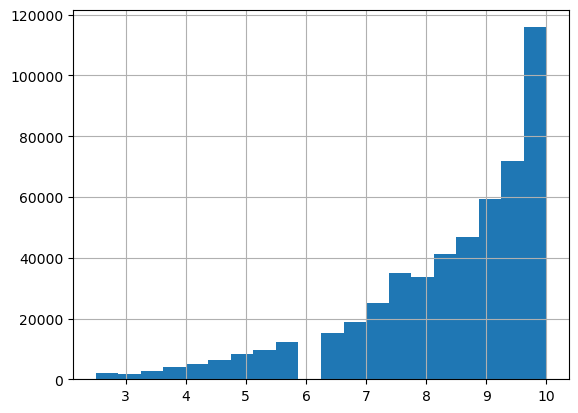

In [ ]:
print(df['Reviewer_Score'].describe()) 

df['Reviewer_Score'].hist(bins=20)

From the histogram over we can see that the distribution of the scores is skewed towards the higher scores. This is not surprising as people tend to give higher scores when they are satisfied with a product or service.

## **Cleaning the review text**

Here we clean the review text. We remove 'No Negative' and 'No Positive' from the negative and positive reviews. 
Then we merge the negative and positive reviews into one column called 'Review'. This is done because it is easier to work with one column when doing the sentiment analysis.
After, we only keep the 'Review' and 'Reviewer_Score' columns because they are the only relevant columns for the sentiment analysis. All other columns are dropped. 
We also remove rows with missing values because they are not useful for the sentiment analysis.

In [ ]:
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: x.replace('No Negative', ''))
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: x.replace('No Positive', ''))

df['Review'] = df['Negative_Review'] + ' ' + df['Positive_Review']

df = df[['Review','Reviewer_Score']] 

df = df.dropna()

df.head()

,Review,Reviewer_Score
0,I am so angry that i made this post available...,2.9
1,No real complaints the hotel was great great...,7.5
2,Rooms are nice but for elderly a bit difficul...,7.1
3,My room was dirty and I was afraid to walk ba...,3.8
4,You When I booked with your company on line y...,6.7


## **Transforming review scores to binary values**

Here we add a new column called 'Sentiment' which is 1 if the reviewer score is greater than 5 and 0 otherwise. This is done to make it easier to work with the data in the sentiment analysis. 

In [44]:
# Adjust the reviewer score to be binary numeric values
df['Sentiment'] = df['Reviewer_Score'].apply(lambda x: 1 if x >= 8.8 else 0)

# Here we split the data into two dataframes based on the sentiment 
df_majority = df[df['Sentiment'] == 1]
df_minority = df[df['Sentiment'] == 0]

## **Adjusting for sentiment imbalance**
There is a heavy overweight of positive ('high' scores) in the dataset, so we need to downsample the positive reviews to get a more balanced dataset for our machine learning model to train and test on. By balancing the number of positive and negative reviews, we avoid the model being biased towards predicting the majority class which is positive reviews.

In [45]:
# Downsample majority class
df_majority_downsampled = df_majority.sample(len(df_minority))

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

## **Eploring the data after downsampling the positive reviews**

count    444544.000000
mean          8.209730
std           1.682885
min           2.500000
25%           7.100000
50%           8.650000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64
87486
253


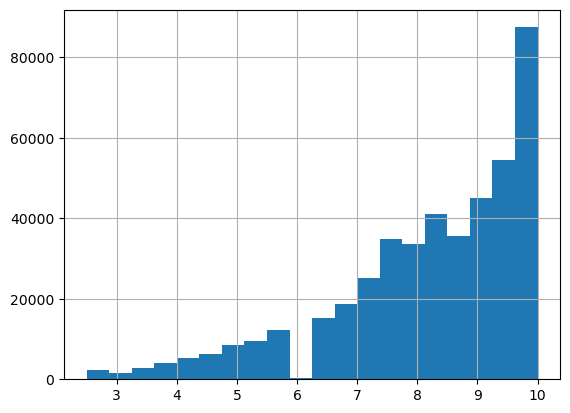

In [46]:
df_balanced['Reviewer_Score'].hist(bins=20) # 20 bins
print(df_balanced['Reviewer_Score'].describe()) 
print(df_balanced[df_balanced['Reviewer_Score'] == 10.0].shape[0])
print(df_balanced[df_balanced['Reviewer_Score'] == 6.0].shape[0])
# 115853
# 253

From the plot we can see that the number of positive and negative reviews are now more balanced. This is good because it will make the machine learning model less biased towards predicting the majority class which is positive reviews. 

## **Preprocessing the review text**

Here we preprocess the review text by lowercasing the text, removing special characters, punctuation using regular expressions, and removing stopwords. We also tokenize and lemmatize the text.

In [47]:
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) 
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['Review'] = df['Review'].apply(preprocess_text)
df.head()

,Review,Reviewer_Score,Sentiment
0,i am so angry that i made this post available...,2.9,0
1,no real complaints the hotel was great great...,7.5,0
2,rooms are nice but for elderly a bit difficul...,7.1,0
3,my room was dirty and i was afraid to walk ba...,3.8,0
4,you when i booked with your company on line y...,6.7,0


### Removing stopwords

In [48]:
import nltk

from nltk.corpus import stopwords
 
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
pattern = r'\b(' + '|'.join(re.escape(word) for word in stop_words) + r')\b'

def remove_stopwords_regex(text):
    if isinstance(text, str):  
        return re.sub(pattern, '', text)  
    return text

df["Review"] = df["Review"].apply(remove_stopwords_regex)
df["Review"] = df["Review"].str.replace(r'\s+', ' ', regex=True).str.strip()
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/runarrossevold/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Reviewer_Score,Sentiment
0,angry made post available via possible sites u...,2.9,0
1,real complaints hotel great great location sur...,7.5,0
2,rooms nice elderly bit difficult rooms two sto...,7.1,0
3,room dirty afraid walk barefoot floor looked c...,3.8,0
4,booked company line showed pictures room thoug...,6.7,0


### Tokenization

In [49]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    return word_tokenize(text)

df['tokens'] = df['Review'].apply(tokenize)
df.head()

,Review,Reviewer_Score,Sentiment,tokens
0,angry made post available via possible sites u...,2.9,0,"[angry, made, post, available, via, possible, ..."
1,real complaints hotel great great location sur...,7.5,0,"[real, complaints, hotel, great, great, locati..."
2,rooms nice elderly bit difficult rooms two sto...,7.1,0,"[rooms, nice, elderly, bit, difficult, rooms, ..."
3,room dirty afraid walk barefoot floor looked c...,3.8,0,"[room, dirty, afraid, walk, barefoot, floor, l..."
4,booked company line showed pictures room thoug...,6.7,0,"[booked, company, line, showed, pictures, room..."


### Stemming

In [50]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem(tokens):
    return [stemmer.stem(token) for token in tokens]

df['stemmed'] = df['tokens'].apply(stem)

df.head()

,Review,Reviewer_Score,Sentiment,tokens,stemmed
0,angry made post available via possible sites u...,2.9,0,"[angry, made, post, available, via, possible, ...","[angri, made, post, avail, via, possibl, site,..."
1,real complaints hotel great great location sur...,7.5,0,"[real, complaints, hotel, great, great, locati...","[real, complaint, hotel, great, great, locat, ..."
2,rooms nice elderly bit difficult rooms two sto...,7.1,0,"[rooms, nice, elderly, bit, difficult, rooms, ...","[room, nice, elderli, bit, difficult, room, tw..."
3,room dirty afraid walk barefoot floor looked c...,3.8,0,"[room, dirty, afraid, walk, barefoot, floor, l...","[room, dirti, afraid, walk, barefoot, floor, l..."
4,booked company line showed pictures room thoug...,6.7,0,"[booked, company, line, showed, pictures, room...","[book, compani, line, show, pictur, room, thou..."


### Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    lemmatized_tokens = []
    for token in tokens:
        try:
            lemmatized_token = lemmatizer.lemmatize(token)
        except Exception as e:
            lemmatized_token = token
        lemmatized_tokens.append(lemmatized_token)
    return lemmatized_tokens

df['lemmatized'] = df['tokens'].apply(lemmatize)

df.head()

,Review,Reviewer_Score,Sentiment,tokens,stemmed,lemmatized
0,angry made post available via possible sites u...,2.9,0,"[angry, made, post, available, via, possible, ...","[angri, made, post, avail, via, possibl, site,...","[angry, made, post, available, via, possible, ..."
1,real complaints hotel great great location sur...,7.5,0,"[real, complaints, hotel, great, great, locati...","[real, complaint, hotel, great, great, locat, ...","[real, complaint, hotel, great, great, locatio..."
2,rooms nice elderly bit difficult rooms two sto...,7.1,0,"[rooms, nice, elderly, bit, difficult, rooms, ...","[room, nice, elderli, bit, difficult, room, tw...","[room, nice, elderly, bit, difficult, room, tw..."
3,room dirty afraid walk barefoot floor looked c...,3.8,0,"[room, dirty, afraid, walk, barefoot, floor, l...","[room, dirti, afraid, walk, barefoot, floor, l...","[room, dirty, afraid, walk, barefoot, floor, l..."
4,booked company line showed pictures room thoug...,6.7,0,"[booked, company, line, showed, pictures, room...","[book, compani, line, show, pictur, room, thou...","[booked, company, line, showed, picture, room,..."


## **Splitting the data into training and test sets**

In [52]:

from sklearn.model_selection import train_test_split
# Split the data into training and test sets (80% training, 20% testing)

X = df['lemmatized'].apply(lambda x: ' '.join(x))

y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Running MultionmialNB with TF-IDF vectorizer**

kanskje vi skal vise forskjellen ved å bruke CountVectorizer og TF-IDF vectorizer. 
s.351 i boken: vi kan se hvilke ord tf-idf vekter høyest og lavest og mener at er viktigst for å predikere sentiment.
Features med lav tf-idf score er mindre viktige for å predikere sentiment. Disse ordene kan være stopwords eller ord som forekommer i mange dokumenter og vil mest sannsynlig ikke være viktige for å predikere sentiment. Dermed kan vi fjerne disse ordene for å forbedre modellen???
Vi kan også finne ordene som har lav inverse document frequency (idf) score og fjerne disse ordene for å forbedre modellen.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training and test data. The vectorizer is used to transform the text data into numerical data
X_train_mnb = vectorizer.fit_transform(X_train) 
X_test_mnb = vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes classifier
mnb_tfidf = MultinomialNB()

# ----Cross Validation----
# Perform cross-validation on the training data. Cross-validation is a technique used to evaluate the performance of a model by training and testing it on multiple subsets of the data
cv_scores = cross_val_score(mnb_tfidf, X_train_mnb, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# ----Grid Search----
# Define the grid of hyperparameters
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'fit_prior': [True, False]
}

# Perform grid search to find the best hyperparameters
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mnb_tfidf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_mnb, y_train)

# Get the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Use the best model from grid search
best_mnb_tfidf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_mnb_tfidf.predict(X_test_mnb)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# classification report gives precision, recall, f1-score, and support for each class, which mean the following:
# Precision: the ratio of correctly predicted positive observations to the total predicted positives
# Recall: the ratio of correctly predicted positive observations to the all observations in actual class
# F1-score: the weighted average of Precision and Recall
# Support: the number of actual occurrences of the class in the specified dataset

Accuracy: 0.7525
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.63      0.69     44455
           1       0.75      0.85      0.80     58693

    accuracy                           0.75    103148
   macro avg       0.75      0.74      0.74    103148
weighted avg       0.75      0.75      0.75    103148



The issue with standard multionomial naive bayes is that it tends to favor the majority class. Since our dataset has an extreme overweight of positive reviews, we decide to try a more fitting model, e.g. ComplimentNB, which is more suitable for imbalanced datasets.

## **Running ComplementNB with TF-IDF vectorizer**

In [ ]:
from sklearn.naive_bayes import ComplementNB

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
X_train_cnb = vectorizer.fit_transform(X_train)
X_test_cnb = vectorizer.transform(X_test)

# Initialize Complement Naive Bayes classifier
cnb_tfidf = ComplementNB()
# Cross-validation

# Perform cross-validation on the training data
cv_scores = cross_val_score(cnb_tfidf, X_train_cnb, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# Grid Search
# Define the grid of hyperparameters

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'norm': [True, False],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=cnb_tfidf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_cnb, y_train)

# Get the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Use the best model from grid search
cnb_tfidf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = cnb_tfidf.predict(X_test_cnb)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7514
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68     44455
           1       0.74      0.86      0.80     58693

    accuracy                           0.75    103148
   macro avg       0.76      0.73      0.74    103148
weighted avg       0.75      0.75      0.75    103148



## **Running SVM with TF-IDF vectorizer**

In [ ]:
from sklearn.svm import LinearSVC

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training and test data
X_train_svc = vectorizer.fit_transform(X_train)
X_test_svc = vectorizer.transform(X_test)

# Initialize Linear Support Vector Classifier
svc_tfidf = LinearSVC()

# Cross-validation
# Perform cross-validation on the training data
cv_scores = cross_val_score(svc_tfidf, X_train_svc, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# Grid Search
# Define the grid of hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [True, False],
    'max_iter': [1000, 2000, 5000]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=svc_tfidf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_svc, y_train)

# Get the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Use the best model from grid search
svc_tfidf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = svc_tfidf.predict(X_test_svc)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))